Url Tableau : https://public.tableau.com/app/profile/aditya.pramana.putra/viz/P0M1_Aditya_Pramana_Hck7/AnalystRentApartmentinGermany?publish=yes

``````
=================================================
Project M1

Nama  : Aditya Pramana Putra
Batch : HCK-7

Performing dataset analysis from Kaggle and performing visualizations to gain insight
=================================================

```

# Case Study - Apartment rental offers in Germany

<left><img src="https://storage.googleapis.com/kaggle-datasets-images/375901/730200/1a7bb3d1613413bde217faa3208f02c0/dataset-cover.jpg?t=2019-10-09-21-16-09" height=216, width=384></img></left>

You are a data analyst at IchRental Company, which is dedicated to offering rental apartments in Germany. Your boss wants to raise the total annual rent rate because he feels that the rent income is falling. You were asked to look at the data on all the apartments in Germany to get insights. Your goal is not only to increase the average monthly rental price as a factor in increased rental costs, but also to provide satisfaction with the services and facilities available in the apartment. You can analyze customer behavior across the state of Germany to achieve this goal.

# Business Understanding

### Defining the Problem Statements

Using SMART framework:

1. **Specific**: Improving service and customer satisfaction already in the apartment.

2. **Measurable**: Increasing the total annual rent rate by 15%.

3. **Achievable**: Increasing quality of facility, service, in-apartment ambience, and room quality Also, implement promotions for renting apartments.

4. **Relevant**: Increasing the total annual rent rate can lead to higher rental income.

5. **Time-Bound**: Achieve within every year.

`Problem statement`:

The goal is to improve service and customer satisfaction in the apartment, with a target of a total annual rental rate of 15% within every year. This will be achieved by increasing the quality of the facility, service, in-apartment ambience, and room quality. Also, implement promotions for renting apartments.

### Breaking Down the Problem

Main problem: 'increasing the total annual rental price as a metric of customer satisfaction'

I'd like to specialize in the state of Nordrhein-Westfalen because it has the largest total rental.

Metode `5W+1H`:
1. How's the total price distribution in each country?
2. Which state has the highest rent?
3. Is there an influence on the rental price distribution in Nordrhein-Westfalen?
4. What are the customers' preferences about apartments with a kitchen, balcony, elevator, garden, and basement?
5. How big is the living room's largest rental price?
6. How many floors are typically preferred by customers, so it generates the largest rental cost in the     Nordrhein Westfalen apartment building?
7. What's the percentage of total customer rental to interior quality in the state?
8. Which primary energy source has the highest total rental price?
9. How does the quality of the interior affect the total rental price?
10. How does the size of the living room affect the total rental price?
11. How does the main energy source of the apartment affect the total rental price?
12. Is there a significant difference between the quality of the interior and the total rental price?



Four questions and the answers I put into my visual tableau:
- Which state has the highest rent?

- Is there an influence on the rental price distribution in Nordrhein-Westfalen?

- What's the percentage of total customer rental to interior quality in the state?

- Which primary energy source has the highest total rental price?

One question that I answered using descriptive statistics:
- How's the total price distribution in each country?

One question that I answered using inferential statistics:
- Is there a significant difference between the quality of the interior and the total rental price?

# Loading data

In [333]:
# import libraries according to our data needs
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [334]:
# Enter the dataset that we want to process into variables using the Pandas library.
data  = pd.read_csv('C:\HCK-07\immo_data.csv')

# Summary data

In [335]:
#  View the top 5 data points.
data.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,...,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,...,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,...,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,...,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,...,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [336]:
# View data information
data.info()

# We can identify data types that do not match and if there is data that is Null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

The conclusion from the data information is that there is some data that is null. Later,  we will delete rows and columns.
(If null > 80%, then we delete the column; otherwise, we delete the row), and we will adjust the data format that is not appropriate for the data cleaning later.

In [337]:
# Look at the central tendency of numeric data.
data.describe()

,serviceCharge,telekomHybridUploadSpeed,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,yearConstructedRange,...,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,heatingCosts,lastRefurbish,electricityBasePrice,electricityKwhPrice
count,261941.000000,45020.0,268850.000000,267018.000000,235492.000000,2.283330e+05,211805.000000,2.688500e+05,93052.000000,211805.000000,...,268850.000000,162344.000000,217541.000000,171118.000000,268850.000000,268850.000000,85518.000000,80711.000000,46846.000000,46846.000000
mean,151.206113,10.0,9.791958,3.389001,28.804928,9.013315e+02,1966.400590,1.069697e+08,1.327634,3.714544,...,2.641261,114.749533,2.122405,3.572319,2.571542,3.070790,76.990866,2013.904536,89.113612,0.199769
std,308.295790,0.0,6.408399,1.964874,16.337151,3.323833e+04,46.992207,1.250093e+07,8.361403,2.738134,...,2.633440,61.653663,3.634934,6.375496,0.937594,1.407127,147.716278,10.963125,5.395805,0.009667
min,0.000000,10.0,0.000000,-12.330000,1.000000,0.000000e+00,1000.000000,2.887174e+07,0.000000,1.000000,...,1.000000,0.100000,-1.000000,0.000000,1.000000,1.000000,0.000000,1015.000000,71.430000,0.170500
25%,95.000000,10.0,6.000000,2.000000,10.000000,4.698000e+02,1950.000000,1.066910e+08,1.000000,1.000000,...,2.000000,79.000000,1.000000,2.000000,2.000000,2.000000,54.000000,2012.000000,90.760000,0.191500
50%,135.000000,10.0,9.000000,3.390000,40.000000,6.500000e+02,1973.000000,1.111584e+08,1.000000,3.000000,...,3.000000,107.000000,2.000000,3.000000,3.000000,3.000000,70.000000,2017.000000,90.760000,0.198500
75%,190.000000,10.0,13.000000,4.570000,40.000000,9.850000e+02,1996.000000,1.137688e+08,1.000000,5.000000,...,3.000000,140.300000,3.000000,4.000000,3.000000,4.000000,90.000000,2019.000000,90.760000,0.205500
max,146118.000000,10.0,121.000000,14.920000,100.000000,1.575154e+07,2090.000000,1.157117e+08,2241.000000,9.000000,...,999.990000,1996.000000,999.000000,999.000000,5.000000,7.000000,12613.000000,2919.000000,90.760000,0.227600


I'll come to a conclusion when I clean up the data.

# Data Cleaning

In [338]:
# Delete inappropriate data columns.
remove = ['facilities','description','livingSpaceRange','noRoomsRange','floor','regio2','regio3','noRooms','geo_plz','baseRentRange','street','streetPlain','geo_krs','houseNumber','baseRent','yearConstructedRange','geo_bln','telekomUploadSpeed','pricetrend','picturecount','newlyConst','picturecount','telekomTvOffer','telekomHybridUploadSpeed','noParkSpaces','electricityKwhPrice','electricityBasePrice','lastRefurbish','energyEfficiencyClass','heatingCosts']
data = data.drop(columns = remove) 
data

,regio1,serviceCharge,heatingType,balcony,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,livingSpace,condition,interiorQual,petsAllowed,lift,typeOfFlat,thermalChar,numberOfFloors,garden,date
0,Nordrhein_Westfalen,245.00,central_heating,False,840.0,1965.0,96107057,oil,False,True,86.00,well_kept,normal,NaN,False,ground_floor,181.40,3.0,True,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,True,NaN,1871.0,111378734,gas,False,False,89.00,refurbished,normal,no,False,ground_floor,NaN,NaN,False,May19
2,Sachsen,255.00,floor_heating,True,1300.0,2019.0,113147523,NaN,False,True,83.80,first_time_use,sophisticated,NaN,True,apartment,NaN,4.0,False,Oct19
3,Sachsen,58.15,district_heating,True,NaN,1964.0,108890903,district_heating,False,False,58.15,NaN,NaN,NaN,False,other,86.00,NaN,False,May19
4,Bremen,138.00,self_contained_central_heating,True,903.0,1950.0,114751222,gas,False,False,84.97,refurbished,NaN,NaN,False,apartment,188.90,NaN,False,Feb20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268845,Bayern,90.00,heat_pump,True,910.0,2016.0,115641081,geothermal,False,True,90.00,mint_condition,sophisticated,no,False,roof_storey,NaN,NaN,False,Feb20
268846,Hessen,220.00,gas_heating,True,1150.0,1983.0,96981497,gas,True,False,115.00,well_kept,sophisticated,negotiable,False,apartment,NaN,1.0,False,May19
268847,Hessen,220.00,central_heating,True,930.0,1965.0,66924271,gas,False,True,95.00,well_kept,NaN,negotiable,False,apartment,160.77,2.0,True,Feb20
268848,Nordrhein_Westfalen,175.00,heat_pump,True,1015.0,2019.0,110938302,gas,False,True,70.00,first_time_use,sophisticated,no,True,apartment,24.70,5.0,False,May19


I deleted the data column that was not related to my problem statement. And I will use the data column that supports my problem statement.

In [339]:
# Change the column name to make it easier to understand.
data.rename(columns = {"regio1": "Bundesland"}, inplace = True)

Saya ganti namanya karena nama pada kolom dataset tidak spesifik pada kamus data yang disediakan

In [340]:
# Checks for null data
data.isnull().sum()

Bundesland              0
serviceCharge        6909
heatingType         44856
balcony                 0
totalRent           40517
yearConstructed     57045
scoutId                 0
firingTypes         56964
hasKitchen              0
cellar                  0
livingSpace             0
condition           68489
interiorQual       112665
petsAllowed        114573
lift                    0
typeOfFlat          36614
thermalChar        106506
numberOfFloors      97732
garden                  0
date                    0
dtype: int64

It can be seen that there is no more than 80% null data. Then I will delete the null according to the row.

In [341]:
# Delete null data.
data = data.dropna()

In [342]:
# Check if null data has been removed.
data.isnull().sum()

Bundesland         0
serviceCharge      0
heatingType        0
balcony            0
totalRent          0
yearConstructed    0
scoutId            0
firingTypes        0
hasKitchen         0
cellar             0
livingSpace        0
condition          0
interiorQual       0
petsAllowed        0
lift               0
typeOfFlat         0
thermalChar        0
numberOfFloors     0
garden             0
date               0
dtype: int64

Now there is no data that is null. Next, I will replace the data type that does not match.

In [343]:
# Re-check the data type that does not match.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34734 entries, 8 to 268848
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bundesland       34734 non-null  object 
 1   serviceCharge    34734 non-null  float64
 2   heatingType      34734 non-null  object 
 3   balcony          34734 non-null  bool   
 4   totalRent        34734 non-null  float64
 5   yearConstructed  34734 non-null  float64
 6   scoutId          34734 non-null  int64  
 7   firingTypes      34734 non-null  object 
 8   hasKitchen       34734 non-null  bool   
 9   cellar           34734 non-null  bool   
 10  livingSpace      34734 non-null  float64
 11  condition        34734 non-null  object 
 12  interiorQual     34734 non-null  object 
 13  petsAllowed      34734 non-null  object 
 14  lift             34734 non-null  bool   
 15  typeOfFlat       34734 non-null  object 
 16  thermalChar      34734 non-null  float64
 17  numberOfFlo

- I will change the data type in the 'date' column to datetime format, and I assume everything starts from the 1st, to make it easier for me to see trends in rental prices.
- I will change the inappropriate float data type to an integer.
- For ID, I changed it to a string type because ID is unique.

In [344]:
# Changing the data type
data['date'] = pd.to_datetime(data['date'],format='%b%y')
data['yearConstructed'] = data['yearConstructed'].astype(int)
data['numberOfFloors'] = data['numberOfFloors'].astype(int)
data['scoutId'] = data['scoutId'].astype(str)
cols = ["lift", "balcony", "hasKitchen", "cellar", "garden"]
data[cols] = data[cols].replace({True: 1, False:0})

C:\Users\Aditya Pramana Putra\AppData\Local\Temp\ipykernel_22756\3582657015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = pd.to_datetime(data['date'],format='%b%y')
C:\Users\Aditya Pramana Putra\AppData\Local\Temp\ipykernel_22756\3582657015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['yearConstructed'] = data['yearConstructed'].astype(int)
C:\Users\Aditya Pramana Putra\AppData\Local\Temp\ipykernel_22756\3582657015.py:4: SettingWithCopyWarning: 
A value is trying to be set o

- I also changed boolean data to integers to make it easier for me to visualize data and correlate later.

In [345]:
# Check the data type again.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34734 entries, 8 to 268848
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Bundesland       34734 non-null  object        
 1   serviceCharge    34734 non-null  float64       
 2   heatingType      34734 non-null  object        
 3   balcony          34734 non-null  int64         
 4   totalRent        34734 non-null  float64       
 5   yearConstructed  34734 non-null  int32         
 6   scoutId          34734 non-null  object        
 7   firingTypes      34734 non-null  object        
 8   hasKitchen       34734 non-null  int64         
 9   cellar           34734 non-null  int64         
 10  livingSpace      34734 non-null  float64       
 11  condition        34734 non-null  object        
 12  interiorQual     34734 non-null  object        
 13  petsAllowed      34734 non-null  object        
 14  lift             34734 non-null  int6

The data type is correct.

In [346]:
# Check for duplicate data.
data[data.duplicated()]

,Bundesland,serviceCharge,heatingType,balcony,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,livingSpace,condition,interiorQual,petsAllowed,lift,typeOfFlat,thermalChar,numberOfFloors,garden,date


No duplicate data

# Data Analyst

#### Statistika Deskriptif

1. How's the total price distribution in each country?

In [347]:
# Create a new variable to make it easier for us if you want to use the previous data.
data1 = data.copy()
# Check the data description of the price column.
data1['totalRent'].describe()

count    3.473400e+04
mean     1.302669e+03
std      8.451521e+04
min      0.000000e+00
25%      4.850000e+02
50%      6.828250e+02
75%      1.040000e+03
max      1.575154e+07
Name: totalRent, dtype: float64

Conclusion:
- From our data, which totals 34.734 rows, the data has a minimum value of 0 and a maximum value of 15.751.535
- We can see that the standard value is an interval value of only +/- 84.515 from the average and is very far from the maximum value. This means that the outlier values in our data are very extreme.
- Because the distribution of total rent data is not normal, it is better for us to use the median to see the characteristics of the data in the data visualization.

In [348]:
# Check the skew and kurtosis values for extreme outliers.
x = data1['totalRent'].skew()
y = data1['totalRent'].kurtosis()

print(f'skew : {x:.2f}')
print(f'kurtosis : {y:.2f}')

skew : 186.35
kurtosis : 34729.91


It is clear that the skew and kurtosis values are very large, meaning that our conclusions based on the descriptive data are proven.
- The outliers in the data are extreme.

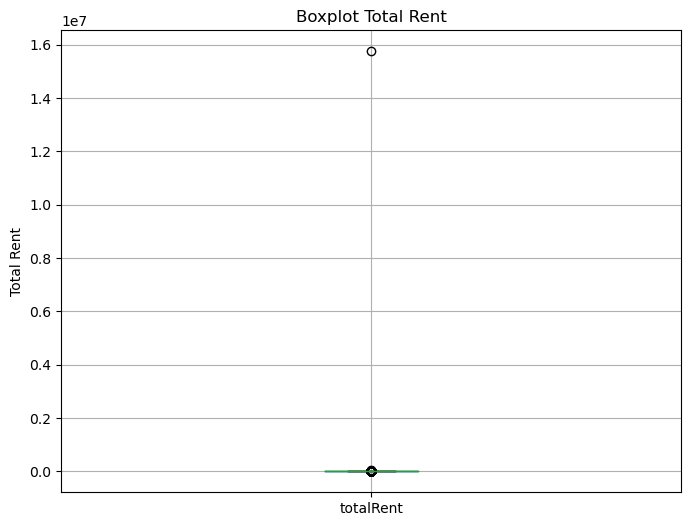

In [349]:
# Seeing outliers in the data visualization

# Create boxplots
plt.figure(figsize=(8, 6))
box = data1.boxplot(column=['totalRent'])
plt.title('Boxplot Total Rent')
plt.ylabel('Total Rent')
plt.show()

There is one very extreme outlier. We can look deeper to see what the factors are that cause this outlier. And maybe this can support the increase in total rent in our company today based on the characteristics of customers who are present at the apartment at the outlier value.

In [350]:
# find value with methode Tukey 
# Because the skewness value is > +- 0.5. So we use the Tukey method.
# Formulas :
#Upper boundary: Q3 + 3*IQR -> I multiply it by 3 because the skewness value is too big.
#Lower boundary: Q1 - 3*IQR
#IQR = Q3 - Q1

q1 = data1['totalRent'].quantile(0.25)
q3 = data1['totalRent'].quantile(0.75) # Find the value of q1, q3, and iqr.
iqr = q3 - q1

Up = q3 + 3*iqr
Low = q1 - 3*iqr # Look for high and low values.

print('Tukey"s Rule')
print('Batas atas:',Up)
print('Batas bawah:',Low) # result

Tukey"s Rule
Batas atas: 2705.0
Batas bawah: -1180.0


We get the limits for outliers in our data. This limit is to find out the existence of our outliers.

In [351]:
# Filter the outlier data to get insight from the data.

data_outlier = data1[((data['totalRent'] > 2705.0) | (data1['totalRent'] < -1180.0))] # Data2 is a variable with data that has no outliers.
data_outlier

,Bundesland,serviceCharge,heatingType,balcony,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,livingSpace,condition,interiorQual,petsAllowed,lift,typeOfFlat,thermalChar,numberOfFloors,garden,date
566,Bayern,350.00,self_contained_central_heating,1,4120.00,2008,54796919,gas,1,1,212.00,fully_renovated,luxury,negotiable,1,roof_storey,257.6,4,0,2018-09-01
1579,Hessen,393.00,floor_heating,1,2823.00,2019,112771294,pellet_heating,1,1,142.00,first_time_use,luxury,negotiable,1,penthouse,67.0,4,0,2020-02-01
1649,Berlin,372.29,district_heating,1,2992.67,1992,111389979,district_heating,1,1,155.12,well_kept,sophisticated,negotiable,1,apartment,83.0,8,0,2019-10-01
2758,Nordrhein_Westfalen,410.00,central_heating,1,2710.00,1960,106290391,gas,1,1,162.13,refurbished,luxury,negotiable,1,penthouse,76.6,5,0,2018-09-01
5664,Nordrhein_Westfalen,450.00,central_heating,1,3450.00,1930,110681409,gas,1,1,188.00,first_time_use_after_refurbishment,sophisticated,negotiable,1,apartment,75.0,4,0,2019-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266626,Berlin,300.00,central_heating,1,3150.00,1876,75018555,gas,1,1,172.00,mint_condition,sophisticated,no,1,roof_storey,120.9,5,0,2019-05-01
266665,Berlin,242.72,district_heating,1,2851.96,2019,114583282,district_heating,1,0,121.36,first_time_use,sophisticated,negotiable,1,apartment,75.9,5,0,2020-02-01
267225,Bayern,448.00,central_heating,1,2948.00,2016,111288489,district_heating,1,1,128.00,first_time_use,luxury,no,1,maisonette,64.9,2,1,2019-05-01
267355,Hessen,350.00,district_heating,1,2940.00,2015,114088342,district_heating,0,1,161.00,mint_condition,sophisticated,no,1,penthouse,64.0,3,0,2020-02-01


The outlier data is 418 lines.

In [352]:
data_outlier['totalRent'].max()

15751535.0

The maximum value of the outlier data is 15,751,535. And this is our extreme outlier; henceforth, we can measure the center of the rental price data with the median because there are extreme outliers.

In [353]:
# Create a new data variable that has no outliers.
data_Non_outlier = data1[~((data['totalRent'] > 2705.0) | (data1['totalRent'] < -1180.0))] # data2 adalah varibel dengan data yang sudah tidak ada outlier
data_Non_outlier['totalRent'].max()

2700.0

I want to see the characteristics of normal data only. For outlier data, I separate it into other variables so as not to disturb the measurement of the center of the data.

2. Which state has the highest rent?

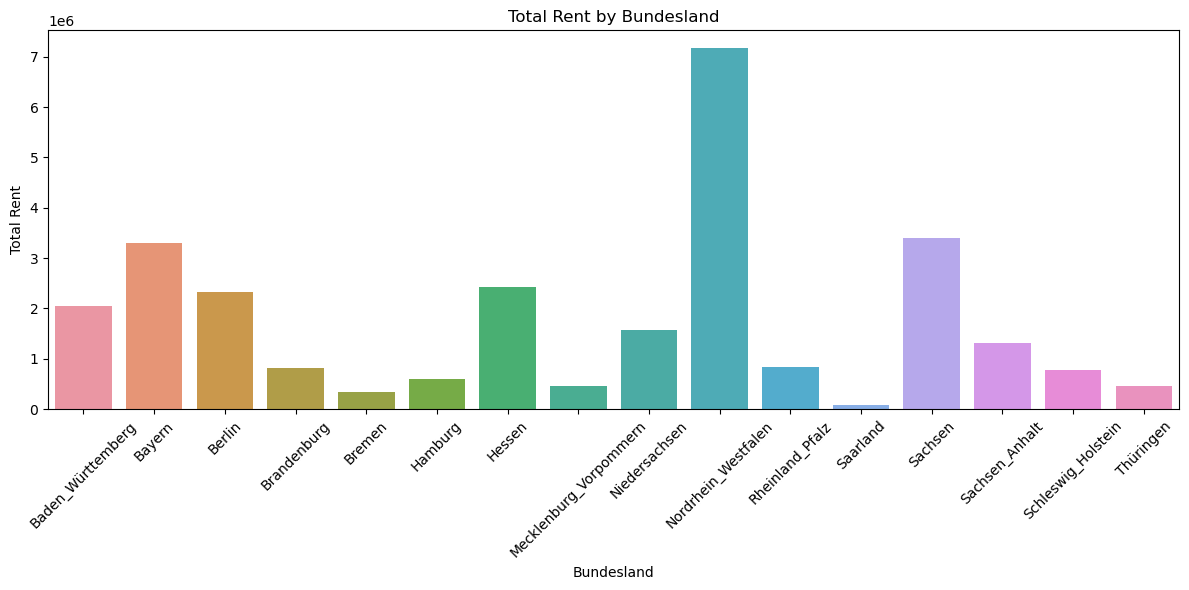

In [354]:
# Answer questions with a histogram visualization.
check = data_Non_outlier.groupby(['Bundesland']).agg({'totalRent':'sum'})

# Creating plots using Seaborn
plt.figure(figsize=(12, 6))  # Size plot
sns.barplot(data=check, x=check.index, y='totalRent')
plt.title('Total Rent by Bundesland')  # Tittle plot
plt.xlabel('Bundesland')  # Label  x
plt.ylabel('Total Rent')  # Label  y
plt.xticks(rotation=45)  # Region label rotation for better readability
plt.tight_layout()

plt.show()  # Show plot

In [355]:
data_Non_outlier.groupby(['Bundesland']).agg({'totalRent':'sum'}).sort_values(by='totalRent', ascending=False)

,totalRent
Bundesland,
Nordrhein_Westfalen,7167410.44
Sachsen,3393350.66
Bayern,3301879.29
Hessen,2429546.32
Berlin,2317375.39
Baden_Württemberg,2044695.54
Niedersachsen,1577742.52
Sachsen_Anhalt,1320539.89
Rheinland_Pfalz,844911.60


The conclusion is that the state of Nordrhein-Westfalen has the data concentration distribution with the highest rent of 7.167.410 euros. Next, we can see what characteristics lead to high customer rental prices.

In [356]:
# deepdive bundesland Nordrhein_Westfalen

data_Nordrhein_Westfalen = data_Non_outlier[data_Non_outlier['Bundesland'] == 'Nordrhein_Westfalen']

We create a variable Berlin for deep dives in the state of Nordrhein-Westfalen only.

3. What is the impact of the year of construction of the apartment on the total rental price?

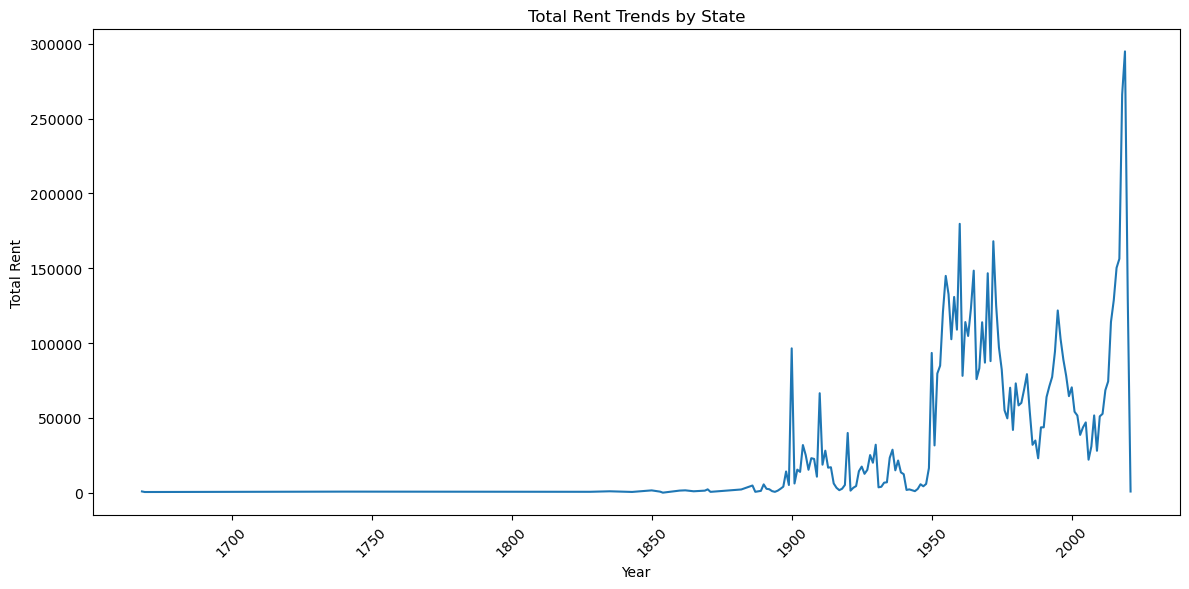

In [357]:
# What is the impact of the year of construction of the apartment on the total rental price?
trends1= data_Nordrhein_Westfalen.groupby(['yearConstructed']).agg({'totalRent':'sum'})
# Creating plots using Seaborn
plt.figure(figsize=(12, 6))  

sns.lineplot(data=trends1, x='yearConstructed', y='totalRent')
plt.title('Total Rent Trends by State')  
plt.xlabel('Year')  
plt.ylabel('Total Rent')  
plt.xticks(rotation=45)  
plt.tight_layout()

plt.show()  

In [358]:
trends1.sort_values(by='totalRent', ascending=False)

,totalRent
yearConstructed,
2019,294861.32
2018,266011.69
1960,179642.37
1972,167992.42
2017,156262.66
...,...
1894,547.00
1871,535.00
1843,480.00


Conclusion:
Based on the data, we can see that the highest price trend increase was in 2019, with a price increase of 294.861 euros.

4. What are the customers' preferences about apartments with a kitchen, balcony, elevator, garden, and basement?

In [359]:
data_Nordrhein_Westfalen_2019 = data_Nordrhein_Westfalen[data_Nordrhein_Westfalen['yearConstructed'] == 2019]
data_Nordrhein_Westfalen_2019

,Bundesland,serviceCharge,heatingType,balcony,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,cellar,livingSpace,condition,interiorQual,petsAllowed,lift,typeOfFlat,thermalChar,numberOfFloors,garden,date
366,Nordrhein_Westfalen,125.00,floor_heating,1,1300.00,2019,111269593,gas,1,1,90.00,first_time_use,luxury,no,0,apartment,30.00,2,0,2019-05-01
373,Nordrhein_Westfalen,265.98,floor_heating,1,1448.10,2019,113544783,gas,0,1,98.51,first_time_use,sophisticated,negotiable,1,apartment,42.04,3,0,2019-10-01
4447,Nordrhein_Westfalen,199.00,heat_pump,1,1618.00,2019,111756438,heat_supply,0,0,144.29,first_time_use_after_refurbishment,sophisticated,no,0,apartment,63.20,2,0,2020-02-01
4560,Nordrhein_Westfalen,250.00,heat_pump,1,1610.00,2019,115676108,gas,0,1,101.00,first_time_use,sophisticated,negotiable,1,maisonette,31.00,5,0,2020-02-01
8250,Nordrhein_Westfalen,260.00,floor_heating,1,1704.00,2019,113383201,gas,0,1,131.00,first_time_use,sophisticated,no,1,apartment,32.30,4,0,2020-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262405,Nordrhein_Westfalen,180.00,gas_heating,1,980.00,2019,113562334,gas,0,0,90.00,first_time_use,sophisticated,negotiable,0,apartment,26.00,2,0,2020-02-01
263137,Nordrhein_Westfalen,168.00,combined_heat_and_power_plant,1,1500.00,2019,114419096,combined_heat_and_power_fossil_fuels,0,1,112.00,first_time_use,sophisticated,negotiable,1,penthouse,67.00,4,0,2020-02-01
264745,Nordrhein_Westfalen,135.81,district_heating,1,527.79,2019,115202277,district_heating,0,1,61.73,first_time_use,normal,negotiable,0,apartment,71.20,2,0,2020-02-01
265818,Nordrhein_Westfalen,152.00,floor_heating,1,1116.00,2019,111341271,gas,1,1,89.26,mint_condition,sophisticated,yes,1,apartment,27.00,4,1,2019-05-01


In [360]:
data_Nordrhein_Westfalen_2019['totalRent'].skew()

0.7188469153315709

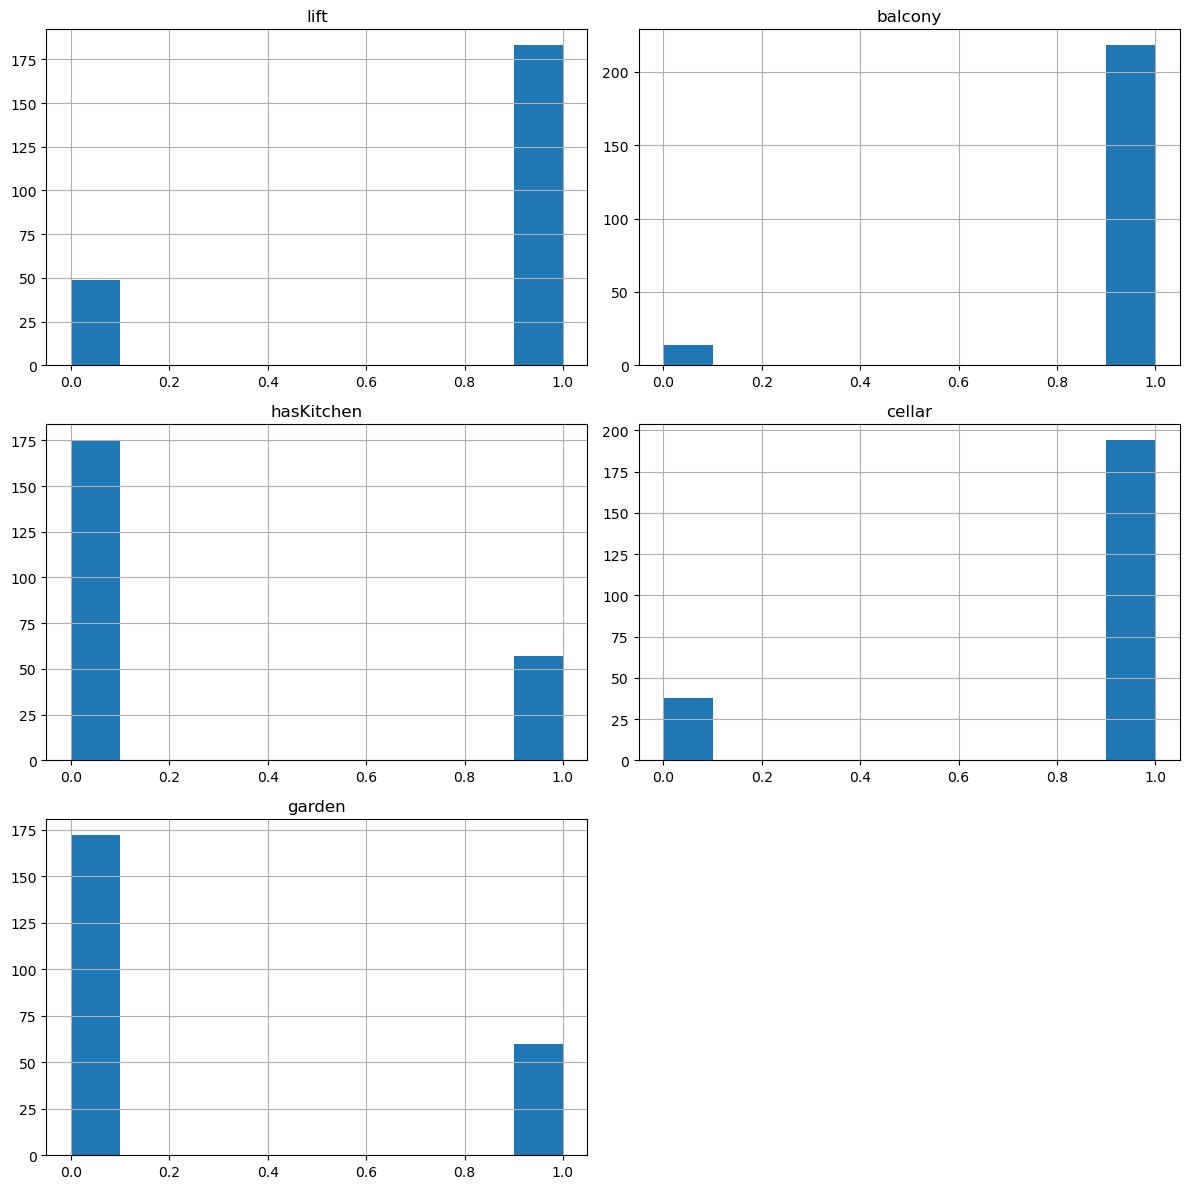

In [361]:
bools = ["lift", "balcony", "hasKitchen", "cellar", "garden"]
data3 = data_Nordrhein_Westfalen_2019[bools]

data3.hist(figsize=(12, 12))
plt.tight_layout()
plt.show()

Conclusion:
- We can see from the data that customers prefer apartments with an elevator, balcony, and basement, and customers prefer apartments without a garden and kitchen.

5. How big is the living room's largest rental price?

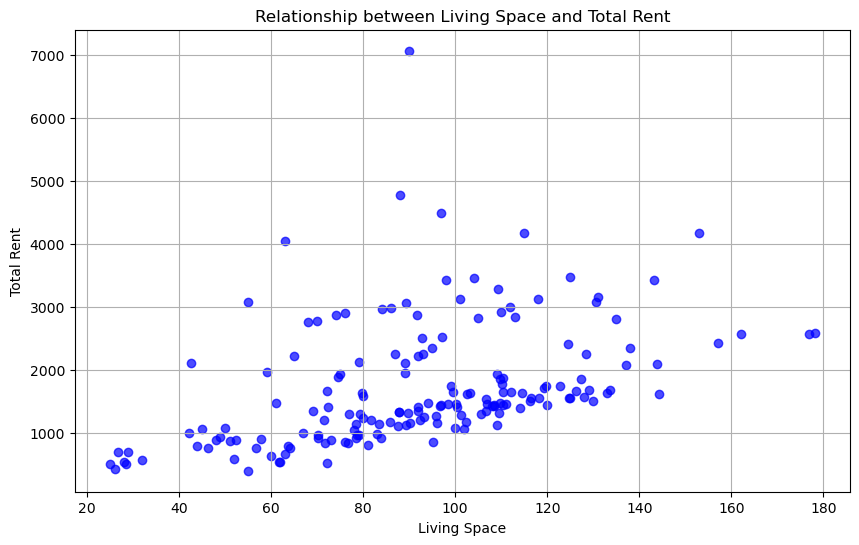

In [362]:
x = data_Nordrhein_Westfalen_2019.groupby(['livingSpace']).agg({'totalRent':'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(x['livingSpace'], x['totalRent'], color='blue', alpha=0.7)
plt.xlabel('Living Space')
plt.ylabel('Total Rent')
plt.title('Relationship between Living Space and Total Rent')
plt.grid(True)
plt.show()

In [363]:
data_Nordrhein_Westfalen_2019.groupby(['livingSpace']).agg({'totalRent':'sum'}).sort_values(by='totalRent', ascending=False)

,totalRent
livingSpace,
90.00,7060.00
88.00,4778.00
97.00,4481.00
115.00,4175.00
153.00,4167.00
...,...
72.09,515.22
28.50,510.00
25.00,500.00


Conclusion :
- We can see that the largest living room area that gets the customer's rental price is 90 m2 at a price of 7.060 euros.

6. How many floors are typically preferred by customers, so it generates the largest rental cost in the     Nordrhein Westfalen apartment building?

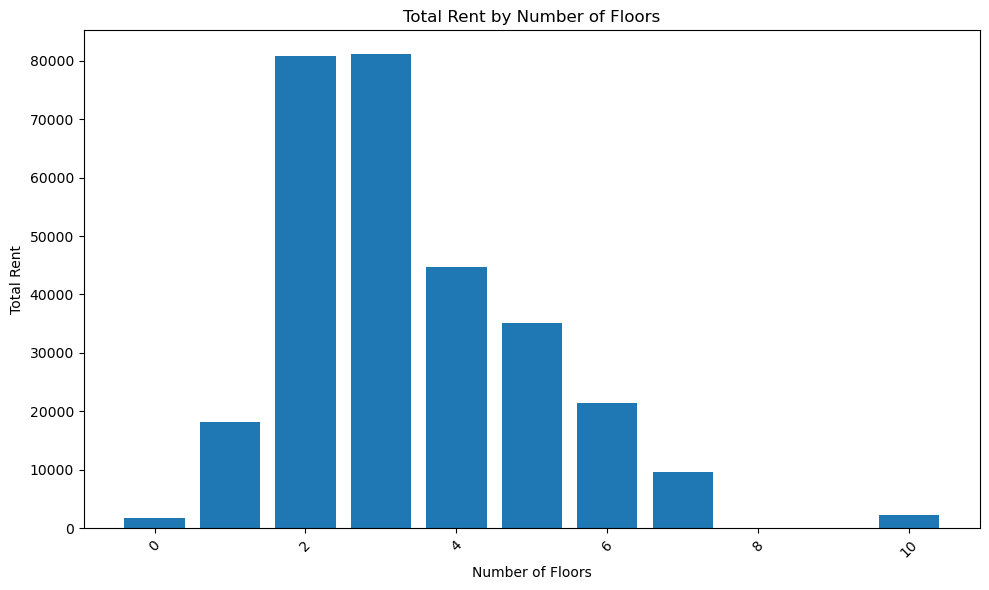

In [364]:
y = data_Nordrhein_Westfalen_2019.groupby(['numberOfFloors']).agg({'totalRent':'sum'}).reset_index()


# Creating plots using Seaborn Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(y['numberOfFloors'],y['totalRent'])
plt.xlabel('Number of Floors')
plt.ylabel('Total Rent')
plt.title('Total Rent by Number of Floors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [365]:
data_Nordrhein_Westfalen_2019.groupby(['numberOfFloors']).agg({'totalRent':'sum'}).sort_values(by='totalRent', ascending=False)

,totalRent
numberOfFloors,
3,81142.70
2,80837.20
4,44665.00
5,35040.42
6,21416.00
1,18118.00
7,9597.00
10,2240.00
0,1805.00


Conclusion:
- We can see that the biggest rental cost is that customers prefer apartments with 3 floors. This means that the height of the apartment floor has no effect on the number of customers visiting.

7. What's the percentage of total customer rental to interior quality in the state?

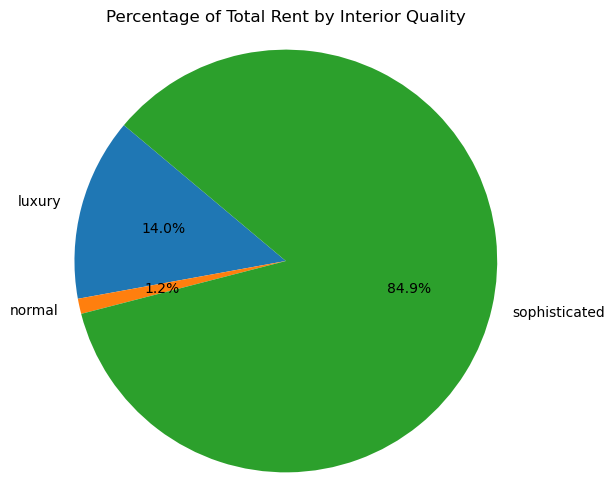

In [366]:
z = data_Nordrhein_Westfalen_2019.groupby(['interiorQual']).agg({'totalRent':'sum'}).reset_index()

# Creating using pie chart
plt.figure(figsize=(6, 6))
plt.pie(z['totalRent'], labels=z['interiorQual'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Rent by Interior Quality')
plt.axis('equal')  # Make sure the pie chart becomes a circle.
plt.show()

In [367]:
data_Nordrhein_Westfalen_2019.groupby(['interiorQual']).agg({'totalRent':'sum'}).sort_values(by='totalRent', ascending=False)

,totalRent
interiorQual,
sophisticated,250232.80
luxury,41201.16
normal,3427.36


Conclusion:
- We can conclude that most of the customers with the largest percentage of total rent are visiting sophisticated apartment types (84.9%). We can see the total rent issued is 250.233 euros.

8. Which primary energy source has the highest total rental price?

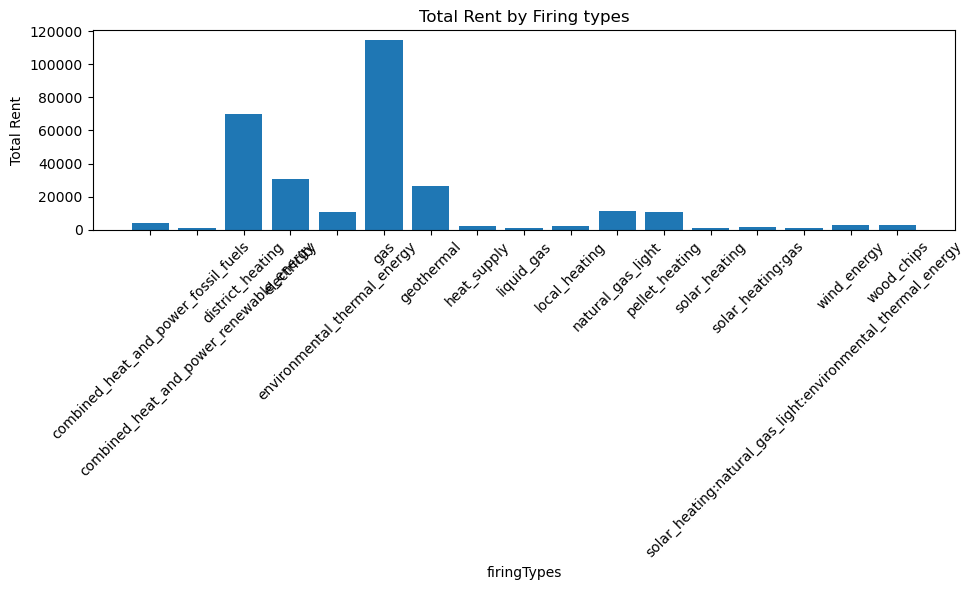

In [368]:
a = data_Nordrhein_Westfalen_2019.groupby(['firingTypes']).agg({'totalRent':'sum'}).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(a['firingTypes'],a['totalRent'])
plt.xlabel('firingTypes')
plt.ylabel('Total Rent')
plt.title('Total Rent by Firing types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [369]:
data_Nordrhein_Westfalen_2019.groupby(['firingTypes']).agg({'totalRent':'sum'}).sort_values(by='totalRent', ascending=False)

,totalRent
firingTypes,
gas,114788.91
district_heating,70199.78
electricity,30925.30
geothermal,26178.53
natural_gas_light,11531.72
pellet_heating,10452.00
environmental_thermal_energy,10419.08
combined_heat_and_power_fossil_fuels,4290.00
wood_chips,2985.00


Conclusion:
- Customers prefer the main energy source to be gas. Maybe this is more adapted to the daily needs of customers, such as cooking, etc.

#### Statistika Inferensial

In [370]:
data_Nordrhein_Westfalen_2019['interiorQual'].value_counts()

sophisticated    199
luxury            28
normal             5
Name: interiorQual, dtype: int64

I want to check what the interior qualities of the data are and how much total data there is.

In [371]:
corr_interiorqual_rent = data_Nordrhein_Westfalen_2019.copy()
corr_interiorqual_rent['interiorQual'].unique()

array(['luxury', 'sophisticated', 'normal'], dtype=object)

I want to see the unique value of interior quality.

In [372]:
corr_interiorqual_rent['interiorQual'] = corr_interiorqual_rent['interiorQual'].replace({'normal':0,'sophisticated':1,'luxury':2})

I want to enter interior quality data levels from normal to luxurious levels in the interval 0–2 or change the data from nominal to ordinal. To make it easier for me to check the correlation between variables

#### Correlation
9. How does the quality of the interior affect the total rental price?

In [373]:
# Examine the relationship between interior quality and total rent.
tau, pval = stats.kendalltau(corr_interiorqual_rent['interiorQual'],corr_interiorqual_rent['totalRent'])
print('Kendall Tau:',tau)

Kendall Tau: 0.15248214896939102


Conclusion :
- We can see from the data that interior quality and total rent have a weak correlation. This means that there is little relationship between the two variables. It can be concluded that there is little relationship if the more expensive the interior quality, the greater the total rent paid by the customer.

10. How does the size of the living room affect the total rental price?

In [374]:
# Memeriksa hubungan antara luas ruang tamu dengan total sewa
tau, pval = stats.kendalltau(corr_interiorqual_rent['livingSpace'],corr_interiorqual_rent['totalRent'])
print('Kendall Tau:',tau)

Kendall Tau: 0.6291370468334235


Conclusion :
- We can see from the data that the area of the apartment's living room and the total rent have a fairly high relationship. This means that there is a fairly high relationship between the two variables, and it can be concluded that there is a fairly high relationship if the wider the apartment's living room area, the greater the total rent paid by the customer.

11. How does the main energy source of the apartment affect the total rental price?

In [375]:
cat_codes = corr_interiorqual_rent['firingTypes'].astype('category')
cat_codes = cat_codes.cat.codes
cat_codes

366       5
373       5
4447      7
4560      5
8250      5
         ..
262405    5
263137    0
264745    2
265818    5
268848    5
Length: 232, dtype: int8

I changed the firing type data into categorical data to make it easier for me to correlate with total rent as numerical data.

In [376]:
# Memeriksa hubungan antara sumber utama energi apartemen dengan total sewa
tau, pval = stats.kendalltau(cat_codes,corr_interiorqual_rent['totalRent'])
print('Kendall Tau:',tau)

Kendall Tau: -0.04366544562469912


Conclusion :
- We can see from the data that there is almost no negative relationship between the main energy source of the apartment and the total rent. This means that there is a very weak relationship between the two variables, and it can be concluded that there is a very weak relationship if the wider the living room of the apartment, the smaller the total rent paid by the customer.

12. Is there a significant difference between the quality of the interior and the total rental price?

#### Different test

In [377]:
sophisticated = data_Nordrhein_Westfalen_2019['totalRent'][data_Nordrhein_Westfalen_2019['interiorQual']=='sophisticated']
normal = data_Nordrhein_Westfalen_2019['totalRent'][data_Nordrhein_Westfalen_2019['interiorQual']=='normal']
luxury = data_Nordrhein_Westfalen_2019['totalRent'][data_Nordrhein_Westfalen_2019['interiorQual']=='luxury']

I want to create a variable for each type of interior quality to do a differential test.

H0 : There is no significant difference between the total rent for the 3 categories of interior quality.

H1 : There is a significant difference between the total rental of the 3 categories of interior quality.

In [378]:
res = stats.f_oneway(sophisticated,normal, luxury)
x  = format(res.pvalue, '.2f')
print('P-value:', x)

P-value: 0.00


Because the P-value is less than 0.05, there is a significant difference between the total rental of the 3 categories of interior quality.

In conclusion:
- Customers who provide total rental prices for each category of interior quality are different from one another. So each total rental given by a customer for each category has its own selling value. We can see from the apartment facilities or services that each category of apartment interior quality

Overall conclusion:

Based on the analysis of the data that I got, the best way to increase the total annual rent from customers so that our company's income can increase is to provide balconies and a basement with an area of 90 m2 of living room of the'sophisticated' type and more apartments that have 3 floors for several apartments with sources The main energy source is gas. Because customers who issue the largest total rent have the characteristics of satisfaction with apartments like that, And also to increase customer satisfaction in apartment services because customers prefer apartments with elevators, balconies, and basements, we can provide more facilities, such as a sports area on the balcony of the apartment, an elevator so customers don't get tired of climbing stairs, and facilitating apartments with the main energy source, gas, maybe because customers need gas every day. We can also expand the basement because maybe many of our customers have vehicles. This has been realized: we can provide promotions to each customer so that they are satisfied with the services and facilities at our apartment. And we can increase the total annual rent by the percentage we want.

#### Save data to csv

In [379]:
data_Non_outlier.to_csv('offer rent apart.csv')